[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-aps.ipynb)

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

!pip install -U --no-cache-dir gdown --pre

## [Click this link](https://github.com/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-raps.ipynb) for a version of APS with much-improved practical performance.

In [3]:
# Load cached data
if not os.path.exists("../data"):
    os.system("gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz")
    os.system("tar -xf ../data.tar.gz -C ../")
    os.system("rm ../data.tar.gz")
if not os.path.exists("../data/imagenet/human_readable_labels.json"):
    !wget -nv -O ../data/imagenet/human_readable_labels.json -L https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json

data = np.load("../data/imagenet/imagenet-resnet152.npz")
example_paths = os.listdir("../data/imagenet/examples")
smx = data["smx"]
labels = data["labels"].astype(int)

In [4]:
# Problem setup
n = 1000  # number of calibration points
alpha = 0.1  # 1-alpha is the desired coverage

In [5]:
# Split the softmax scores into calibration and validation sets (save the shuffling)
idx = np.array([1] * n + [0] * (smx.shape[0] - n)) > 0
np.random.shuffle(idx)
cal_smx, val_smx = smx[idx, :], smx[~idx, :]
cal_labels, val_labels = labels[idx], labels[~idx]

### Conformal prediction happens here

In [30]:
# Get scores. calib_X.shape[0] == calib_Y.shape[0] == n
cal_pi = cal_smx.argsort(1)[:, ::-1]
cal_srt = np.take_along_axis(cal_smx, cal_pi, axis=1).cumsum(axis=1)
cal_scores = np.take_along_axis(cal_srt, cal_pi.argsort(axis=1), axis=1)[
    range(n), cal_labels
]
# Get the score quantile
qhat = np.quantile(
    cal_scores, np.ceil((n + 1) * (1 - alpha)) / n, interpolation="higher"
)
# Deploy (output=list of length n, each element is tensor of classes)
val_pi = val_smx.argsort(1)[:, ::-1]
val_srt = np.take_along_axis(val_smx, val_pi, axis=1).cumsum(axis=1)
prediction_sets = np.take_along_axis(val_srt <= qhat, val_pi.argsort(axis=1), axis=1)

In [31]:
# Calculate empirical coverage
empirical_coverage = prediction_sets[
    np.arange(prediction_sets.shape[0]), val_labels
].mean()
print(f"The empirical coverage is: {empirical_coverage}")

The empirical coverage is: 0.9028775510204081


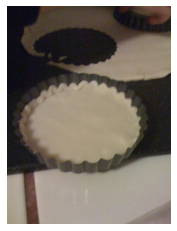

The prediction set is: ['great white shark', 'hammerhead shark', 'electric ray', 'stingray', 'hen', 'junco', 'magpie', 'chickadee', 'bald eagle', 'vulture', 'newt', 'loggerhead sea turtle', 'leatherback sea turtle', 'mud turtle', 'terrapin', 'banded gecko', 'green iguana', 'agama', 'frilled-necked lizard', 'Gila monster', 'European green lizard', 'chameleon', 'Nile crocodile', 'American alligator', 'triceratops', 'ring-necked snake', 'eastern hog-nosed snake', 'kingsnake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'African rock python', 'Indian cobra', 'sea snake', 'Saharan horned viper', 'eastern diamondback rattlesnake', 'sidewinder', 'trilobite', 'scorpion', 'southern black widow', 'tarantula', 'tick', 'centipede', 'black grouse', 'prairie grouse', 'peacock', 'grey parrot', 'macaw', 'sulphur-crested cockatoo', 'lorikeet', 'hornbill', 'toucan', 'duck', 'goose', 'black swan', 'jellyfish', 'sea anemone', 'flatworm', 'nematode', 'conch', 'slug', 'sea

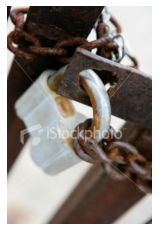

The prediction set is: ['can opener', 'chain', 'chain-link fence', 'cleaver', 'combination lock', 'corkscrew', 'hammer', 'hook', 'clothes iron', 'knot', 'nail', 'padlock', 'hand plane', 'safety pin', 'weighing scale', 'strainer', 'switch']


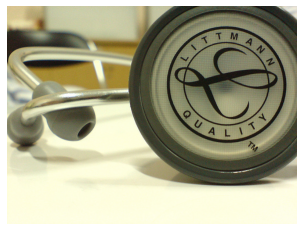

The prediction set is: ['analog clock', 'barbell', 'digital clock', 'dumbbell', 'lens cap', 'stethoscope', 'wall clock']


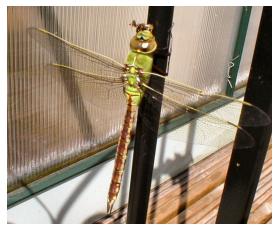

The prediction set is: ['bulbul', 'jay', 'fire salamander', 'banded gecko', 'green iguana', 'Carolina anole', 'desert grassland whiptail lizard', 'agama', 'frilled-necked lizard', 'alligator lizard', 'European green lizard', 'chameleon', 'American alligator', 'water snake', 'vine snake', 'night snake', 'green mamba', 'sea snake', 'harvestman', 'yellow garden spider', 'barn spider', 'European garden spider', 'southern black widow', 'tarantula', 'wolf spider', 'tick', 'centipede', 'peacock', 'grey parrot', 'macaw', 'toucan', 'nematode', 'Dungeness crab', 'red king crab', 'American lobster', 'spiny lobster', 'crayfish', 'isopod', 'Chihuahua', 'Redbone Coonhound', 'Irish Setter', 'Schipperke', 'Miniature Pinscher', 'Egyptian Mau', 'cougar', 'tiger beetle', 'longhorn beetle', 'fly', 'ant', 'grasshopper', 'cricket', 'stick insect', 'cockroach', 'mantis', 'cicada', 'leafhopper', 'lacewing', 'dragonfly', 'damselfly', 'small white', 'sea urchin', 'weasel', 'mink', 'European polecat', 'black-foo

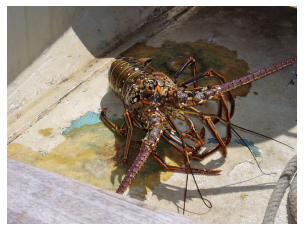

The prediction set is: ['American lobster', 'spiny lobster']


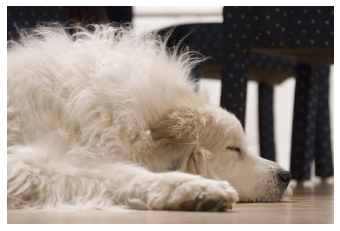

The prediction set is: ['borzoi', 'Golden Retriever', 'Clumber Spaniel', 'Kuvasz', 'Komondor', 'Old English Sheepdog', 'Alaskan Malamute', 'Pyrenean Mountain Dog', 'Samoyed', 'Standard Poodle']


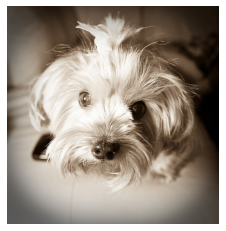

The prediction set is: ['cock', 'hen', 'ostrich', 'house finch', 'bulbul', 'jay', 'chickadee', 'kite', 'spotted salamander', 'axolotl', 'alligator lizard', 'worm snake', 'ring-necked snake', 'smooth green snake', 'kingsnake', 'vine snake', 'night snake', 'harvestman', 'scorpion', 'barn spider', 'European garden spider', 'southern black widow', 'tarantula', 'wolf spider', 'tick', 'centipede', 'ptarmigan', 'ruffed grouse', 'peacock', 'partridge', 'hornbill', 'sea anemone', 'conch', 'snail', 'slug', 'crayfish', 'hermit crab', 'isopod', 'flamingo', 'limpkin', 'bustard', 'ruddy turnstone', 'Chihuahua', 'Japanese Chin', 'Maltese', 'Pekingese', 'Shih Tzu', 'King Charles Spaniel', 'Papillon', 'toy terrier', 'Rhodesian Ridgeback', 'Bluetick Coonhound', 'Italian Greyhound', 'Otterhound', 'Weimaraner', 'Staffordshire Bull Terrier', 'Border Terrier', 'Kerry Blue Terrier', 'Irish Terrier', 'Norfolk Terrier', 'Norwich Terrier', 'Yorkshire Terrier', 'Wire Fox Terrier', 'Lakeland Terrier', 'Sealyham T

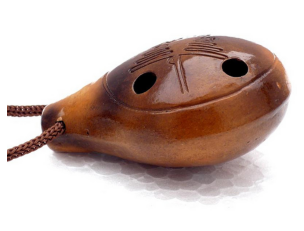

The prediction set is: []


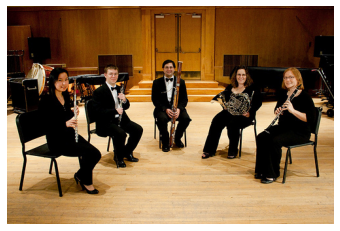

The prediction set is: ['abaya', 'academic gown', 'accordion', 'acoustic guitar', 'assault rifle', 'banjo', 'bassoon', 'military cap', 'bow tie', 'cello', 'cornet', 'drum', 'drumstick', 'electric guitar', 'flute', 'French horn', 'grand piano', 'harmonica', 'harp', 'slip-on shoe', 'military uniform', 'oboe', 'pan flute', 'rifle', 'saxophone', 'stage', 'suit', 'trombone', 'violin', 'bridegroom']


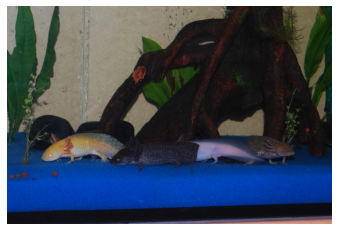

The prediction set is: ['tench', 'goldfish', 'tiger shark', 'hammerhead shark', 'electric ray', 'fire salamander', 'smooth newt', 'newt', 'spotted salamander', 'axolotl', 'American bullfrog', 'tree frog', 'tailed frog', 'loggerhead sea turtle', 'leatherback sea turtle', 'mud turtle', 'terrapin', 'banded gecko', 'green iguana', 'Carolina anole', 'desert grassland whiptail lizard', 'agama', 'frilled-necked lizard', 'alligator lizard', 'Gila monster', 'European green lizard', 'chameleon', 'Komodo dragon', 'Nile crocodile', 'American alligator', 'triceratops', 'worm snake', 'water snake', 'night snake', 'boa constrictor', 'African rock python', 'Indian cobra', 'green mamba', 'sea snake', 'Saharan horned viper', 'scorpion', 'tarantula', 'grey parrot', 'macaw', 'coucal', 'toucan', 'platypus', 'koala', 'slug', 'fiddler crab', 'American lobster', 'spiny lobster', 'crayfish', 'pelican', 'king penguin', 'sea lion', 'Staffordshire Bull Terrier', 'American Staffordshire Terrier', 'Boston Terrier',

In [33]:
# Show some examples
with open("../data/imagenet/human_readable_labels.json") as f:
    label_strings = np.array(json.load(f))

example_paths = os.listdir("../data/imagenet/examples")
for i in range(10):
    rand_path = np.random.choice(example_paths)
    img = imread("../data/imagenet/examples/" + rand_path)
    img_index = int(rand_path.split(".")[0])
    img_pi = smx[img_index].argsort()[::-1]
    img_srt = np.take_along_axis(smx[img_index], img_pi, axis=0).cumsum()
    prediction_set = np.take_along_axis(img_srt <= qhat, img_pi.argsort(), axis=0)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print(f"The prediction set is: {list(label_strings[prediction_set])}")

This method was first introduced in https://arxiv.org/abs/2006.02544 and studied further for image classifiers in https://arxiv.org/abs/2009.14193.